# Figure 6: Denmark Strait freshwater transport basin timeseries

This notebook will reproduce Figure 6 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Mar 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cmasher as cmr
import utils as ut
from inputs import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
masks_plot=['global','gland','natl','arct','norw']
mths_a=['Mar','Jun','Sep','Dec']
mths_b=mth

In [3]:
def preproc(ds):
    ds=ds.interp(lag_years=np.arange(-5,0,0.025))
    return ds

In [4]:
ds_tseries_vtime=xr.open_dataset('../data_out/horflux_fw_denm_adjsens_basin_tseries_vtime.nc')

In [5]:
ds_tseries_vtime

<xarray.Dataset> Size: 3MB
Dimensions:     (month: 4, eyear: 3, mask: 11, stat: 2, time: 780, i_g: 90,
                 j_g: 90)
Coordinates: (12/14)
  * time        (time) datetime64[ns] 6kB 1996-01-08 1996-01-15 ... 2014-12-26
  * i_g         (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 82 83 84 85 86 87 88 89
  * j_g         (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 82 83 84 85 86 87 88 89
  * stat        (stat) <U6 48B 'sum' 'abssum'
  * mask        (mask) <U7 308B 'global' 'arct' 'hudson' ... 'gland' 'norw'
    lag_days    (month, eyear, time) float64 75kB ...
    ...          ...
  * month       (month) <U3 48B 'Mar' 'Jun' 'Sep' 'Dec'
    fc          (month, eyear) float64 96B ...
    k           int64 8B ...
    Z           float32 4B ...
    drF         float32 4B ...
    PHrefC      float32 4B ...
Data variables:
    adxx_empmr  (month, eyear, mask, stat, time) float32 824kB ...
    adxx_qnet   (month, eyear, mask, stat, time) float32 824kB ...
    adxx_tauu   (month, eyear, mask, stat, time) float32 824kB ...
    adxx_tauv   (month, eyear, mask, stat, time) float32 824kB ...

In [5]:
ds_tseries_all.close()

NameError: name 'ds_tseries_all' is not defined

In [5]:
#ds_tseries_all=xr.open_dataset('../data_out/horflux_fw_denm_adjsens_basin_tseries.nc')
ds_tseries_all=xr.open_dataset('../data_out/horflux_fw_denm_adjsens_basin_tseries_vlag.nc')
dJ_all=[]
for eyear in eyears:
    print(eyear)
    foo=xr.open_mfdataset(f'{CONTR_DIR}/{eyear}/horflux_fw_denm_contr_tseries_*.nc',combine='nested',concat_dim='exp',preprocess=preproc)
    dJ_all.append(foo.assign_coords({'eyear':eyear}).swap_dims({'exp':'month'}).drop_vars(['exp']))
dJ_all=xr.concat(dJ_all,'eyear',coords='minimal',compat='override')

2006
2014
2000


In [4]:
def preproc(ds):
    eyear=ds.encoding['source'].split('_')[-1][:4]
    ds=ds.interp(lag_years=np.arange(-5,0,0.025))
    return ds.assign_coords({'eyear':eyear})
cum_ev=xr.open_mfdataset(f"{EV_DIR}/????/{FCNAME}_cumev_bylag_bybasin_bymonth_*.nc",combine='nested',concat_dim='eyear',preprocess=preproc)

In [5]:
cum_ev

<xarray.Dataset> Size: 8MB
Dimensions:                  (eyear: 3, month: 12, mask: 11, lag_years: 200)
Coordinates:
  * month                    (month) int64 96B 4 8 12 2 1 7 6 3 5 11 10 9
  * mask                     (mask) <U7 308B 'global' 'arct' ... 'satl' 'egland'
    transp                   <U2 8B 'fw'
    k                        int64 8B 0
    Z                        float32 4B -5.0
    drF                      float32 4B 10.0
    PHrefC                   float32 4B 49.05
    stat                     <U3 12B 'sum'
    exp                      (eyear, month) <U27 4kB dask.array<chunksize=(1, 12), meta=np.ndarray>
  * lag_years                (lag_years) float64 2kB -5.0 -4.975 ... -0.025
  * eyear                    (eyear) <U4 48B '2000' '2006' '2014'
    TRANSP                   <U2 8B 'fw'
Data variables:
    adxx_empmrXEXFempmr_sum  (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    adxx_empmrXoceFWflx_sum  (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    adxx_qnetXEXFqnet_sum    (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    adxx_qnetXoceQnet_sum    (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    adxx_tauuXEXFtauu_sum    (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    adxx_tauuXoceTAUU_sum    (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    adxx_tauvXEXFtauv_sum    (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    adxx_tauvXoceTAUV_sum    (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    wind_EXF                 (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    wind_OCE                 (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    all_EXF                  (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
    all_OCE                  (eyear, month, mask, lag_years) float64 634kB dask.array<chunksize=(1, 12, 11, 200), meta=np.ndarray>
Attributes:
    contact:     emmomp@bas.ac.uk
    references:  Explained variances of ECCOv4r4 Denmark Strait FW flux     r...
    date:        Created on 19/06/2025
    notes:       Data produced by analysis of the ECCOv4r4 global ocean state...

In [8]:
xr.open_dataset('../data_out/ev/2000/horflux_fw_denm_dJ_bylag_bybasin_2000_EXFqnet.nc')

<xarray.Dataset> Size: 32MB
Dimensions:                (lag_years: 1079, year: 22, exp: 12, mask: 11)
Coordinates: (12/15)
  * lag_years              (lag_years) float64 9kB 0.7392 0.7365 ... -4.98
  * year                   (year) int64 176B 1996 1997 1998 ... 2015 2016 2017
    lag_days               (exp, year, lag_years) float64 2MB ...
    transp                 <U2 8B ...
    time                   (exp, year, lag_years) datetime64[ns] 2MB ...
    iter                   (exp, year, lag_years) float64 2MB ...
    ...                     ...
    k                      int64 8B ...
    Z                      float32 4B ...
    drF                    float32 4B ...
    PHrefC                 float32 4B ...
    stat                   <U3 12B ...
  * mask                   (mask) <U7 308B 'global' 'arct' ... 'satl' 'egland'
Data variables:
    adxx_qnetXEXFqnet_sum  (mask, exp, year, lag_years) float64 25MB ...

In [48]:
masks_plot

['global', 'gland', 'natl', 'arct', 'norw']

In [49]:
ds_tseries_all.mask

<xarray.DataArray 'mask' (mask: 11)> Size: 308B
array(['global', 'arct', 'hudson', 'med', 'north', 'baffin', 'barents', 'natl',
       'satl', 'gland', 'norw'], dtype='<U7')
Coordinates:
    k        int64 8B ...
    Z        float32 4B ...
    drF      float32 4B ...
    PHrefC   float32 4B ...
  * mask     (mask) <U7 308B 'global' 'arct' 'hudson' ... 'satl' 'gland' 'norw'

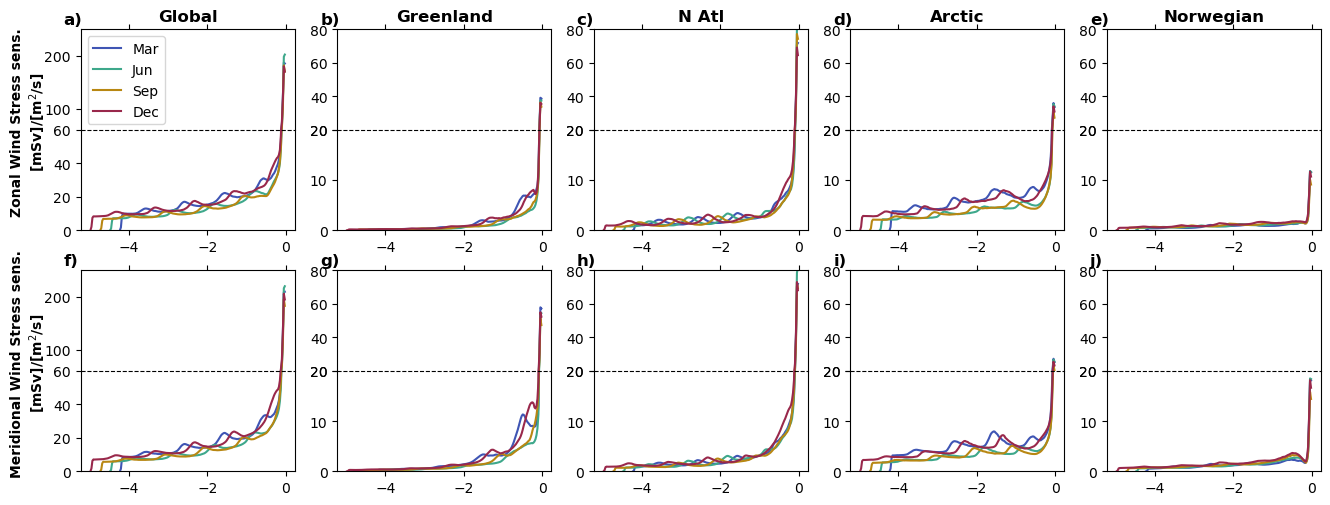

In [50]:
from matplotlib.gridspec import GridSpec
#fig,axs = plt.subplots(4, 5,figsize=[16,6])
fig=plt.figure(figsize=[16,6])
gs = GridSpec(4,5)
colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))

ip=1
upper_lim_global=[60,250]
lower_lim_global=[0,60]
upper_lim_basin=[20,80]
lower_lim_basin=[0,20]

for iv,var in enumerate(['adxx_tauu','adxx_tauv']):
    for ib,basin in enumerate(masks_plot):
        ax1=fig.add_subplot(gs[iv*2,ib])
        ax2=fig.add_subplot(gs[iv*2+1,ib])
        ax2.sharex(ax1)
        pp=[]
        for im,mth in enumerate(mths_a):
            pp.append(((1e-3*ds_tseries_all[var]).sel(stat='abssum',mask=basin,month=mth).mean('eyear').plot(ax=ax1,x='lag_years',add_legend=False,color=colormap[mthi[mth]-1]))[0])
            (1e-3*ds_tseries_all[var]).sel(stat='abssum',mask=basin,month=mth).mean('eyear').plot(ax=ax2,x='lag_years',add_legend=False,color=colormap[mthi[mth]-1])
        if ib ==0:
            ax1.set_ylim(upper_lim_global)
            ax2.set_ylim(lower_lim_global)
            ax2.set_ylabel(f'{adj_labels[var]} sens.\n[mSv]/[{adj_units[var]}]',fontweight='bold',
                           y=1.08
                          )
            if iv==0:
                ax1.legend(pp,mths_a)               
        else:
            ax1.set_ylim(upper_lim_basin)
            ax2.set_ylim(lower_lim_basin)
            ax2.set_ylabel('')
        if iv==0:
            ax1.set_title(masks_labels[basin],fontweight='bold')
        else:
            ax1.set_title('')
        ax2.set_title('')
        ax1.set_ylabel('')
        ax1.set_xlabel('')
        #plt.axhline(0,color='grey')
        ax2.set_xlabel('')        
        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_linestyle('dashed')        
        ax2.spines.top.set_capstyle('butt')
        ax1.xaxis.tick_top()
        ax1.tick_params(labeltop=False)  # don't put tick labels at the top
        ax2.xaxis.tick_bottom()
       # ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
        #ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
        l, b, w, h = ax2.get_position().bounds
        ax2.set_position([l,b+0.2*h,w,h])
        plt.text(-0.08,1.05,f'{chr(96+ip)})',transform=ax1.transAxes,fontsize=12,fontweight='bold')
        ip+=1

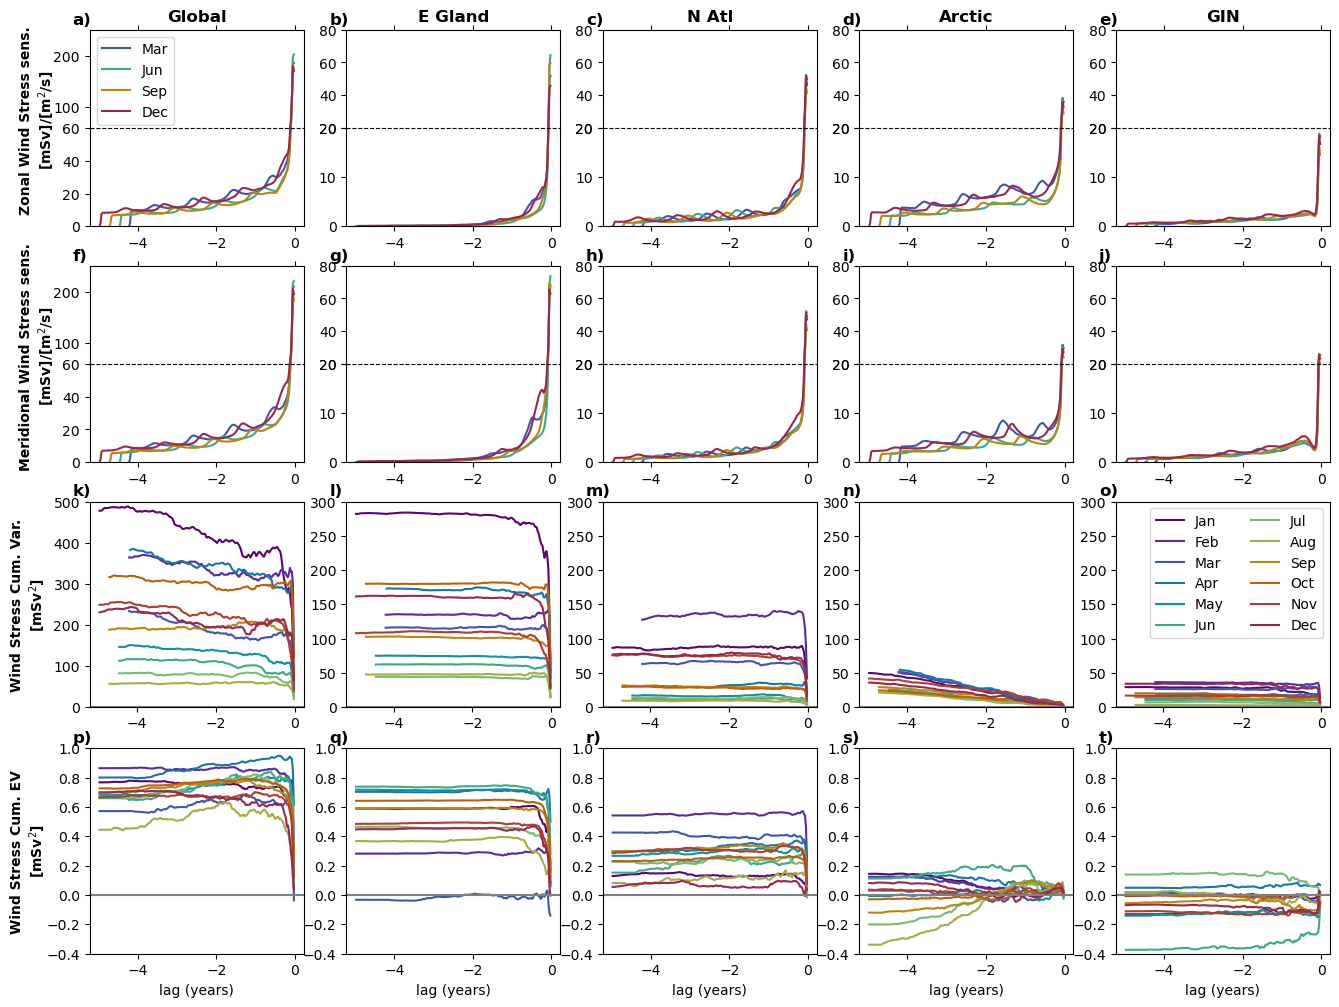

In [54]:
fig=plt.figure(figsize=[16,12])
gs = GridSpec(8,5)
ip=1

colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))
upper_lim_global=[60,250]
lower_lim_global=[0,60]
upper_lim_basin=[20,80]
lower_lim_basin=[0,20]

for iv,var in enumerate(['adxx_tauu','adxx_tauv']):
    for ib,basin in enumerate(masks_plot):
        ax1=fig.add_subplot(gs[iv*2,ib])
        ax2=fig.add_subplot(gs[iv*2+1,ib])
        ax2.sharex(ax1)
        pp=[]
        for im,mth in enumerate(mths_a):
            pp.append(((1e-3*ds_tseries_all[var]).sel(stat='abssum',mask=basin,month=mth).mean('eyear').plot(ax=ax1,x='lag_years',add_legend=False,color=colormap[mthi[mth]-1]))[0])
            (1e-3*ds_tseries_all[var]).sel(stat='abssum',mask=basin,month=mth).mean('eyear').plot(ax=ax2,x='lag_years',add_legend=False,color=colormap[mthi[mth]-1])
        if ib ==0:
            ax1.set_ylim(upper_lim_global)
            ax2.set_ylim(lower_lim_global)
            ax2.set_ylabel(f'{adj_labels[var]} sens.\n[mSv]/[{adj_units[var]}]',fontweight='bold',y=1.08)
            if iv==0:
                ax1.legend(pp,mths_a)               
        else:
            ax1.set_ylim(upper_lim_basin)
            ax2.set_ylim(lower_lim_basin)
            ax2.set_ylabel('')
        if iv==0:
            ax1.set_title(masks_labels[basin],fontweight='bold')
        else:
            ax1.set_title('')
        ax2.set_title('')
        ax1.set_ylabel('')
        ax1.set_xlabel('')
        #plt.axhline(0,color='grey')
        ax2.set_xlabel('')        
        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_linestyle('dashed')        
        ax2.spines.top.set_capstyle('butt')
        ax1.xaxis.tick_top()
        ax1.tick_params(labeltop=False) 
        ax2.xaxis.tick_bottom()
        l, b, w, h = ax2.get_position().bounds
        ax2.set_position([l,b+0.2*h,w,h])
        plt.text(-0.08,1.05,f'{chr(96+ip)})',transform=ax1.transAxes,fontsize=12,fontweight='bold')
        ip+=1
                              
for ib,basin in enumerate(masks_plot):
    ax=fig.add_subplot(gs[4:6,ib])
    pp=[]
    for im,mth in enumerate(mths_b):
        pp.append(((1e-3*dJ_all['wind_OCE']).sel(stat='sum',mask=basin,month=mthi[mth],year=slice(1996,None)).var('year').mean('eyear').dropna('lag_years')[1:].plot(ax=ax,x='lag_years',add_legend=False,color=colormap[im]))[0])
    if ib ==0:
        plt.ylabel(f'Wind Stress Cum. Var.\n[mSv$^2$]',fontweight='bold')
        plt.ylim([0,500])           
    else:
        plt.ylim([0,300])
        plt.ylabel('')
    if ib==len(masks_plot)-1:
        plt.legend(pp,mths_b,ncol=2)  
    plt.title('')
    plt.axhline(0,color='grey')
    plt.xlabel('')
    plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    l, b, w, h = ax.get_position().bounds
    ax.set_position([l,b+0.05*h,w,0.95*h])
    ip+=1

for ib,basin in enumerate(masks_plot):
    ax=fig.add_subplot(gs[6:,ib])
    pp=[]
    for im,mth in enumerate(mths_b):
        pp.append((cum_ev['wind_OCE'].sel(mask=basin,month=mthi[mth]).mean('eyear').plot(ax=ax,x='lag_years',add_legend=False,color=colormap[im]))[0])
    if ib ==0:
        plt.ylabel(f'Wind Stress Cum. EV\n[mSv$^2$]',fontweight='bold',labelpad=-1)
    else:
        plt.ylabel('')
    plt.ylim([-0.4,1.0])
    plt.title('')
    plt.axhline(0,color='grey')
    plt.xlabel('lag (years)')
    plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    l, b, w, h = ax.get_position().bounds
    ax.set_position([l,b,w,0.95*h])
    ip+=1
        
plt.tight_layout()
plt.savefig('../plots/fig6_WindStress_basinTseries.pdf')

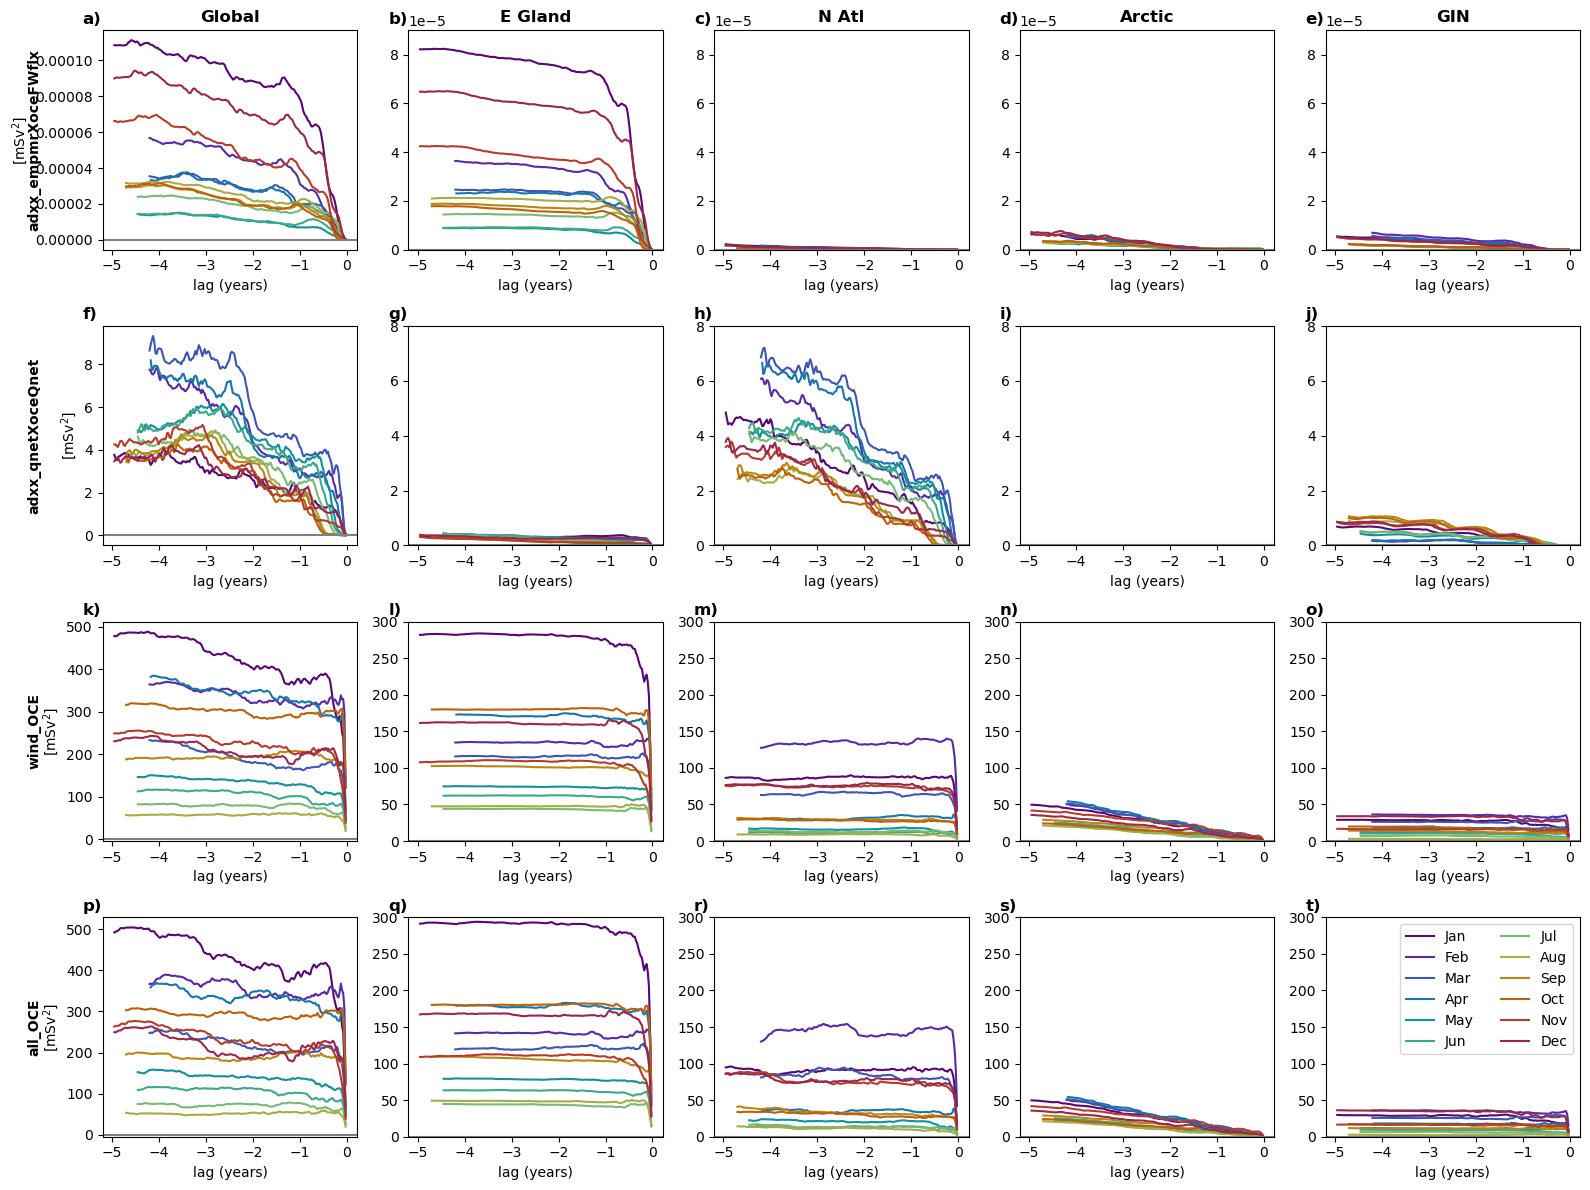

In [32]:
colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))
ylims=[9e-5,8,300,300]

plt.figure(figsize=[16,12])
ip=1
for iv,var in enumerate(['adxx_empmrXoceFWflx','adxx_qnetXoceQnet','wind_OCE','all_OCE']):
    for ib,basin in enumerate(masks_plot):
        ax=plt.subplot(4,len(masks_plot),ip)
        pp=[]
        for im,mth in enumerate(mths_b):
            pp.append(((1e-3*dJ_all[var]).sel(stat='sum',mask=basin,month=mthi[mth],year=slice(1996,None)).var('year').mean('eyear').dropna('lag_years')[1:].plot(ax=ax,x='lag_years',add_legend=False,color=colormap[im]))[0])
        if ib ==0:
            plt.ylabel('[mSv$^2$]')
            ax.text(-0.27,0.5,var,fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)  
    #        plt.ylim([0,500])
        else:
            plt.ylabel('')
            plt.ylim([0,ylims[iv]])
        if iv==0:
            plt.title(masks_labels[basin],fontweight='bold')
        else:
            plt.title('')
   #     plt.ylim([-0.4,1.0])
        plt.axhline(0,color='grey')
        plt.xlabel('lag (years)')
        plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        ip+=1

plt.legend(pp,mths_b,ncol=2)  
plt.tight_layout()

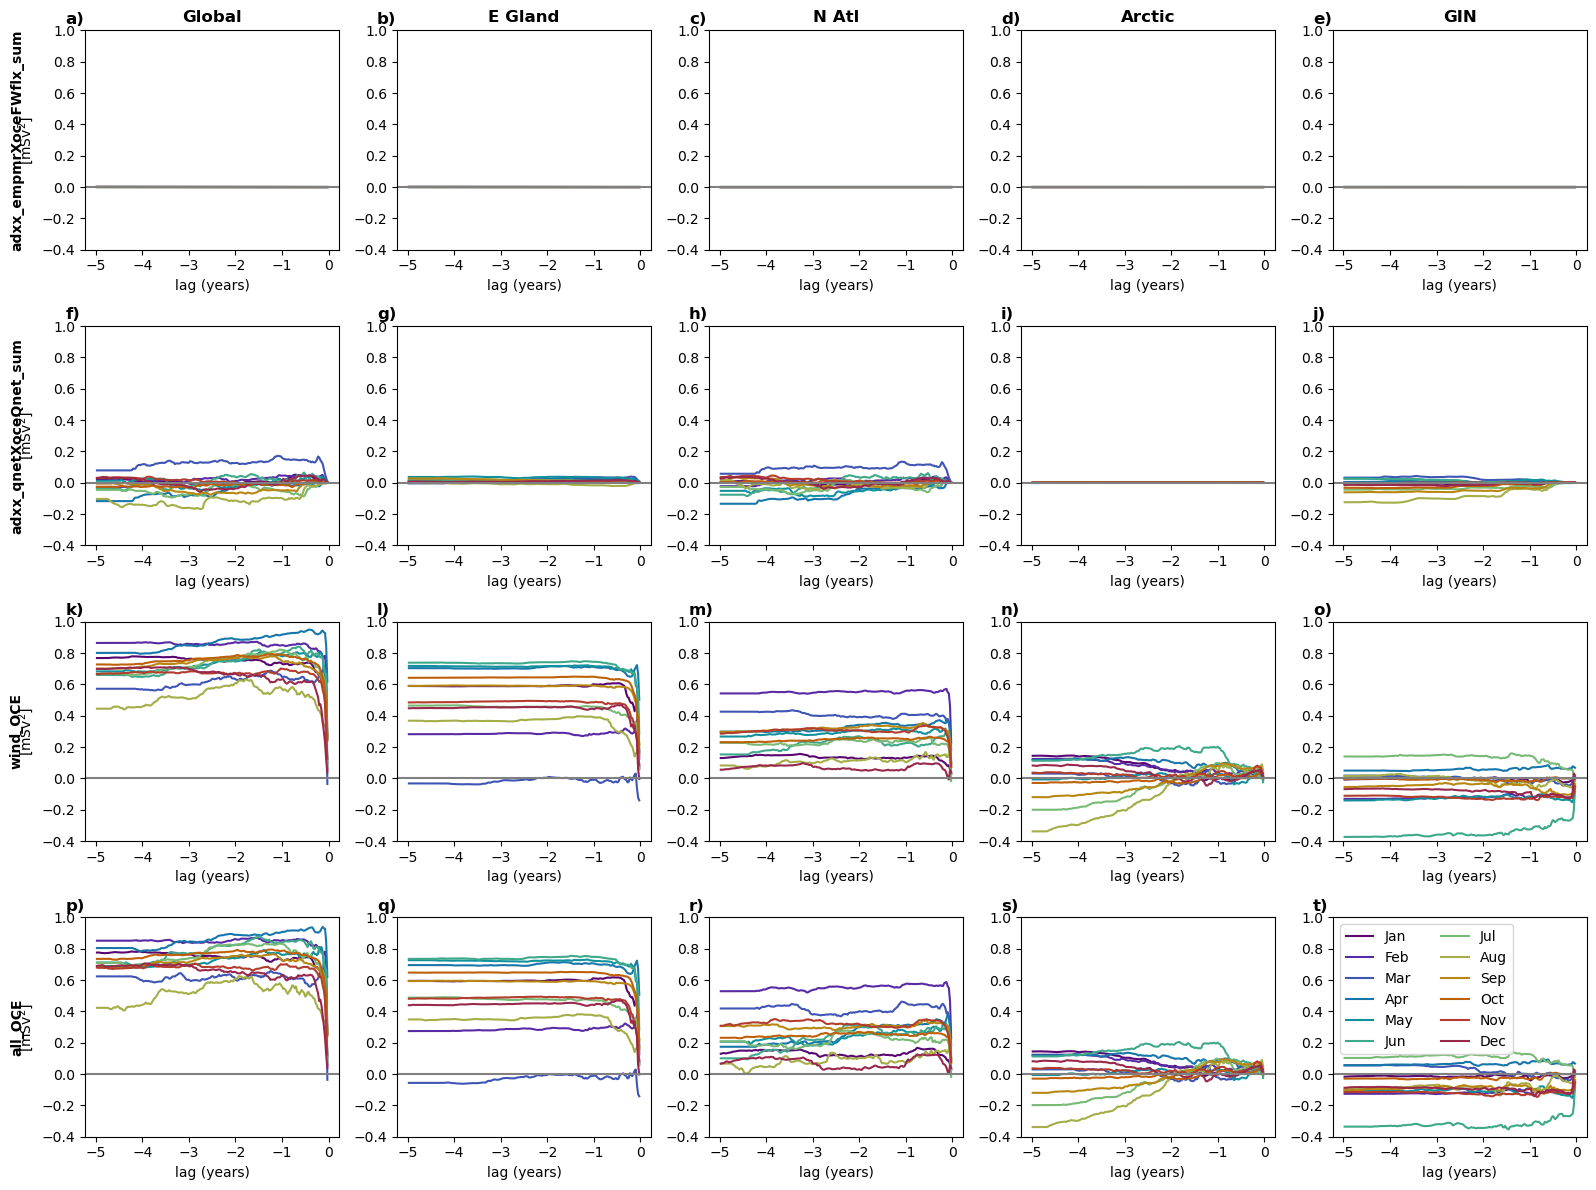

In [14]:
colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))

plt.figure(figsize=[16,12])
ip=1
for iv,var in enumerate(['adxx_empmrXoceFWflx_sum','adxx_qnetXoceQnet_sum','wind_OCE','all_OCE']):
    for ib,basin in enumerate(masks_plot):
        ax=plt.subplot(4,len(masks_plot),ip)
        pp=[]
        for im,mth in enumerate(mths_b):
            pp.append((cum_ev[var].sel(mask=basin,month=mthi[mth]).mean('eyear').plot(ax=ax,x='lag_years',add_legend=False,color=colormap[im]))[0])
        if ib ==0:
            plt.ylabel('[mSv$^2$]')
            ax.text(-0.27,0.5,var,fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)            
        else:
            plt.ylabel('')
        if iv==0:
            plt.title(masks_labels[basin],fontweight='bold')
        else:
            plt.title('')
        plt.ylim([-0.4,1.0])
        plt.axhline(0,color='grey')
        plt.xlabel('lag (years)')
        plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        ip+=1

plt.legend(pp,mths_b,ncol=2)  
plt.tight_layout()

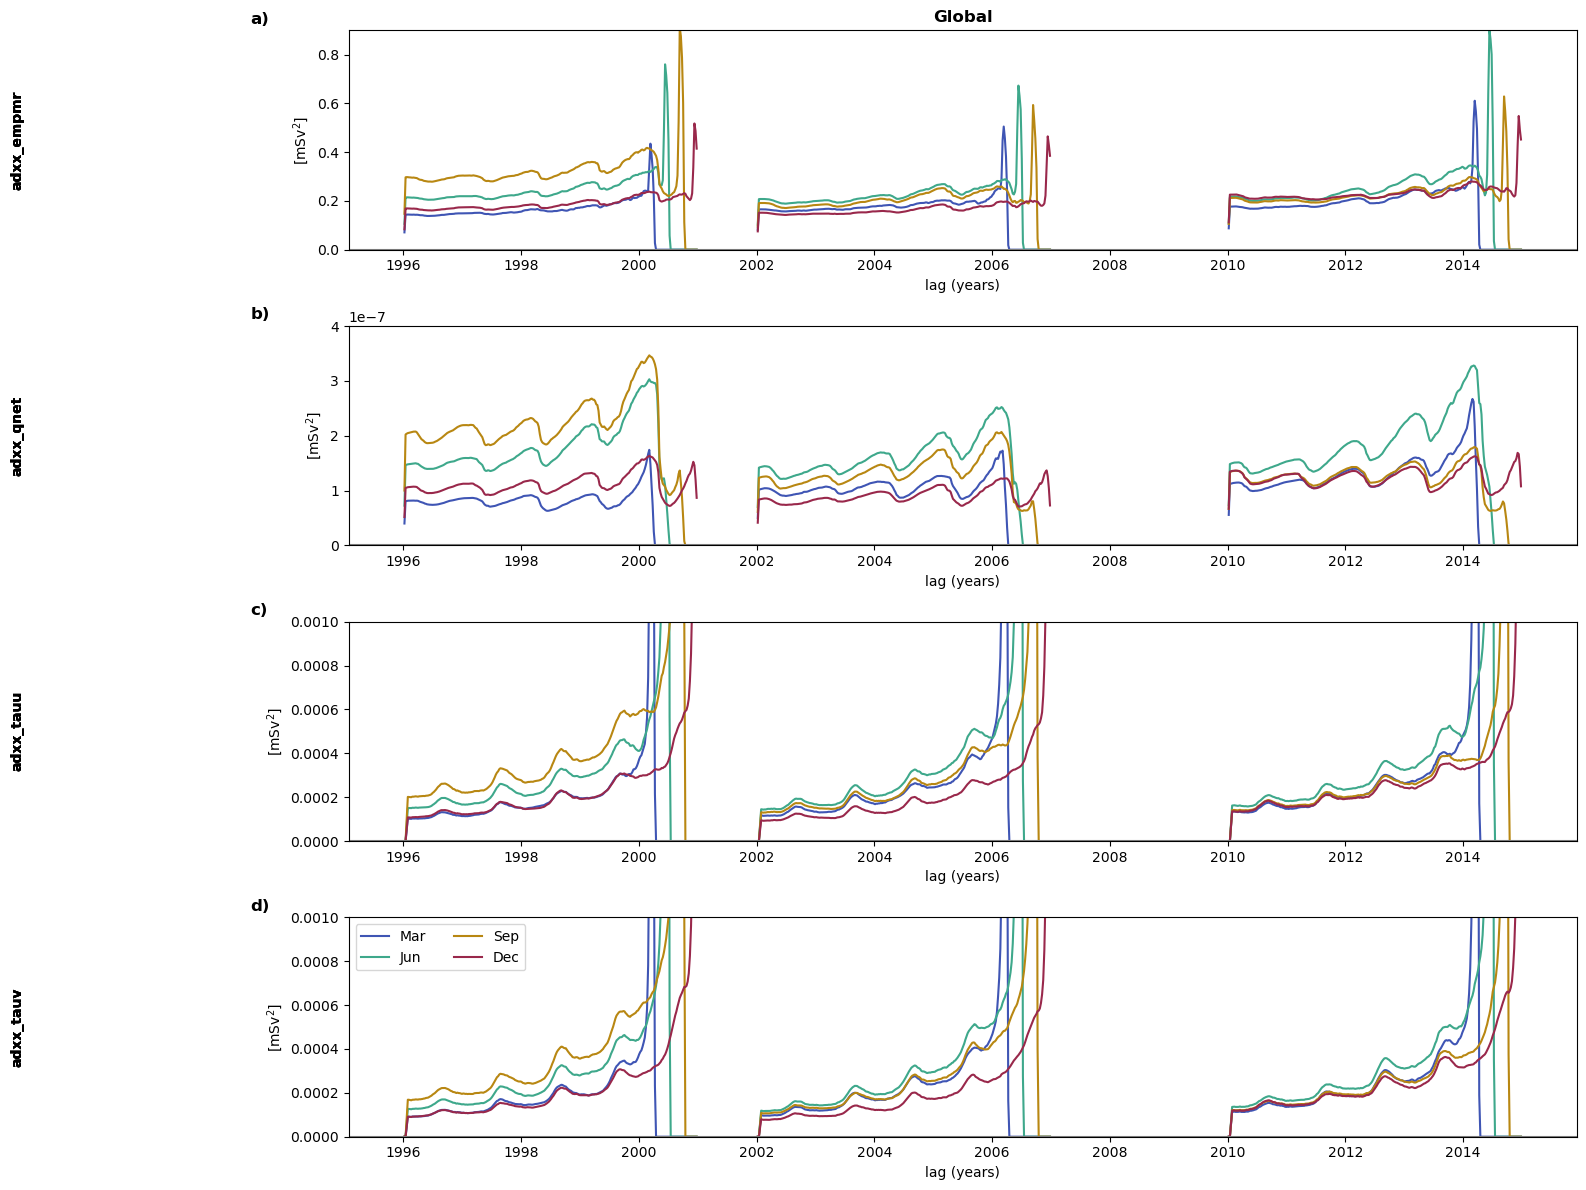

In [12]:
colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))
#ylims=[5e4,0.02,60,60]
ylims=[0.9,4e-7,0.001,0.001]
plt.figure(figsize=[16,12])
ip=1
basin='global'
for iv,var in enumerate(['adxx_empmr','adxx_qnet','adxx_tauu','adxx_tauv']):
  #  for ib,basin in enumerate(masks_plot):
     #   ax=plt.subplot(4,len(masks_plot),ip)
        ax=plt.subplot(4,1,ip)
        pp=[]
        for im,mth in enumerate(mths_a):
            for year in eyears:
                pp.append(((-1e-3*ds_tseries_vtime[var]/ds_tseries_vtime['fc']).sel(stat='abssum',mask=basin,month=mth,eyear=int(year)).plot(ax=ax,x='time',add_legend=False,color=colormap[mthi[mth]-1]))[0])
            plt.ylabel('[mSv$^2$]')
            ax.text(-0.27,0.5,var,fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)
       # if ib==0
    #        plt.ylim([0,500])
       # else:
       #     plt.ylabel('')
        plt.ylim([0,ylims[iv]])
        if iv==0:
            plt.title(masks_labels[basin],fontweight='bold')
        else:
            plt.title('')
   #     plt.ylim([-0.4,1.0])
        plt.axhline(0,color='grey')
        plt.xlabel('lag (years)')
        plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        ip+=1

plt.legend(pp[0:len(pp):3],mths_a,ncol=2)  
plt.tight_layout()

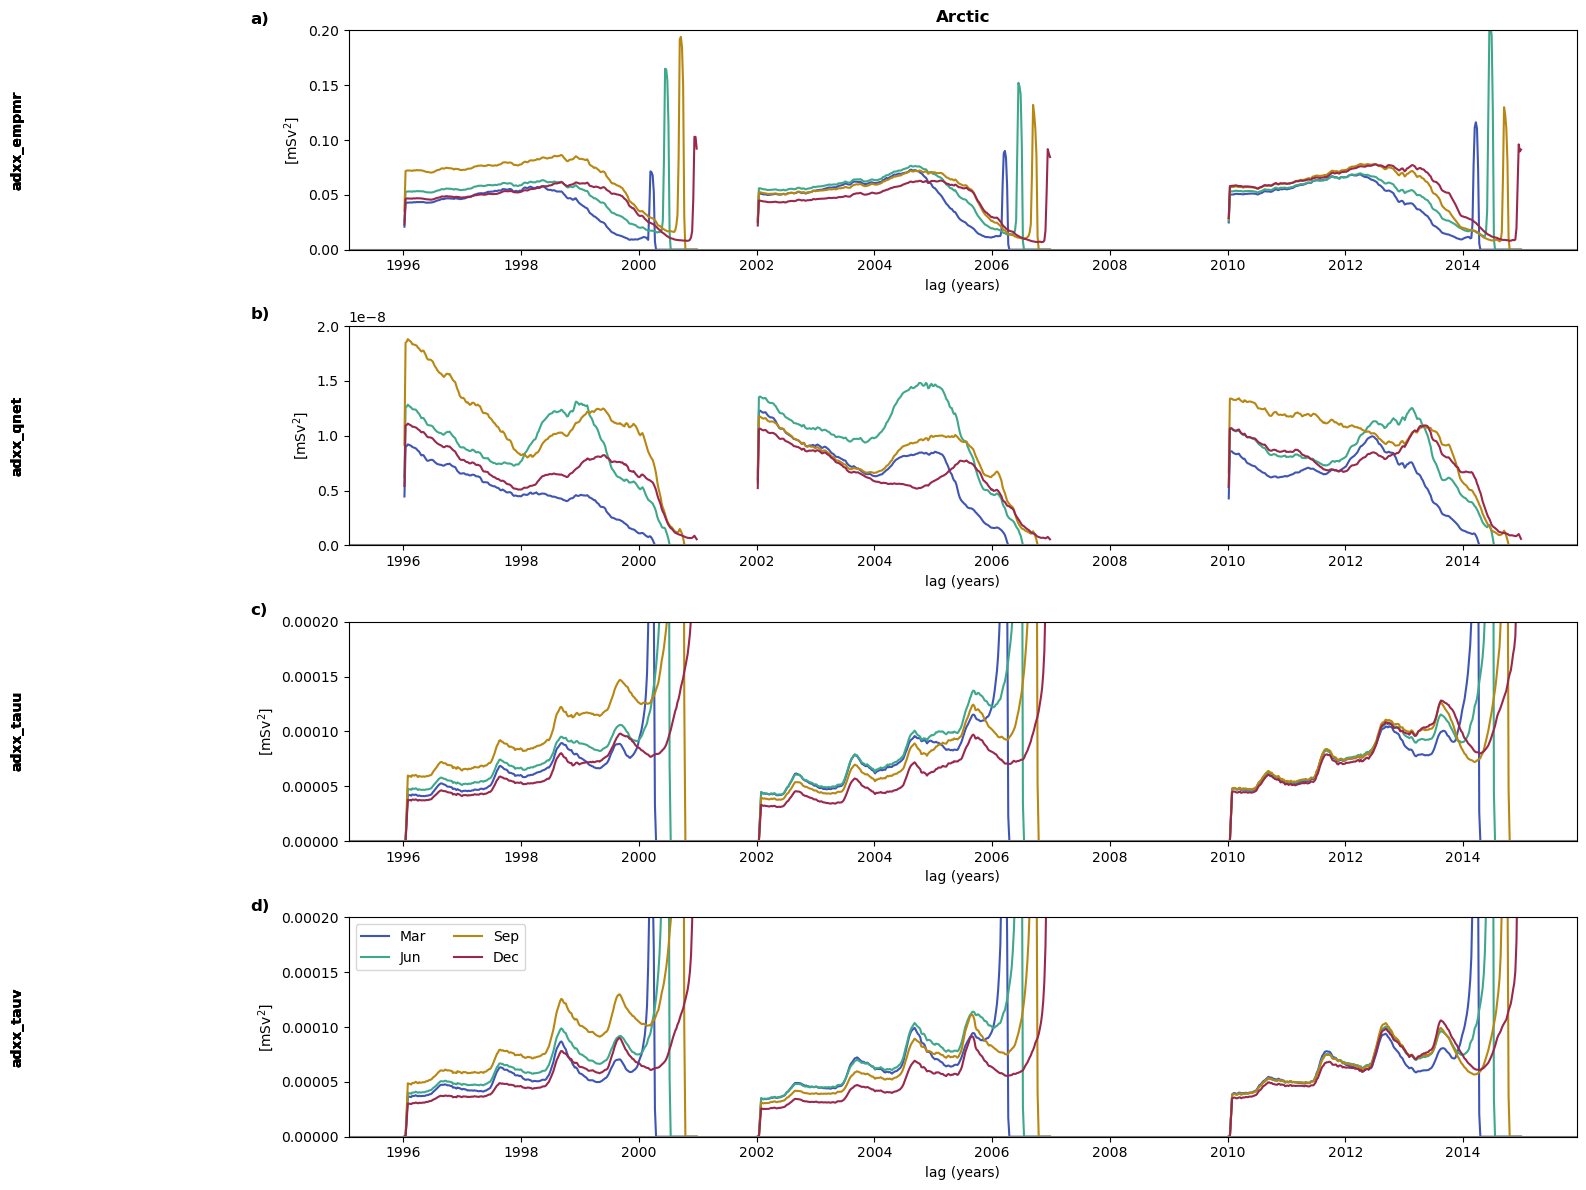

In [15]:
colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))
#ylims=[5e4,0.02,60,60]
ylims=[1e4,0.0015,40,40]
ylims=[0.2,2e-8,0.0002,0.0002]

plt.figure(figsize=[16,12])
ip=1
basin='arct'
for iv,var in enumerate(['adxx_empmr','adxx_qnet','adxx_tauu','adxx_tauv']):
  #  for ib,basin in enumerate(masks_plot):
     #   ax=plt.subplot(4,len(masks_plot),ip)
        ax=plt.subplot(4,1,ip)
        pp=[]
        for im,mth in enumerate(mths_a):
            for year in eyears:
                pp.append(((-1e-3*ds_tseries_vtime[var]/ds_tseries_vtime['fc']).sel(stat='abssum',mask=basin,month=mth,eyear=int(year)).plot(ax=ax,x='time',add_legend=False,color=colormap[mthi[mth]-1]))[0])
            plt.ylabel('[mSv$^2$]')
            ax.text(-0.27,0.5,var,fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)
       # if ib==0
    #        plt.ylim([0,500])
       # else:
       #     plt.ylabel('')
        plt.ylim([0,ylims[iv]])
        if iv==0:
            plt.title(masks_labels[basin],fontweight='bold')
        else:
            plt.title('')
   #     plt.ylim([-0.4,1.0])
        plt.axhline(0,color='grey')
        plt.xlabel('lag (years)')
        plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        ip+=1

plt.legend(pp[0:len(pp):3],mths_a,ncol=2)  
plt.tight_layout()